# **Machine Learning** _Day 73_
##### Name: Muhammad Hassaan
##### Date: July 19, 2024
##### Email: muhammadhassaan7896@gmail.com

# **`Scaling`**

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [2]:
# make an example dataset
data = {
    'age': [25,30,35,40,45],
    'height': [140,150,165,250,170],
    'weight': [70,75,80,85,90],
}

# convert this dataframe
df = pd.DataFrame(data)

In [3]:
df.head()

,age,height,weight
0,25,140,70
1,30,150,75
2,35,165,80
3,40,250,85
4,45,170,90


In [4]:
# import that scaler 
scaler = StandardScaler()

# fit the scaler on data 
scaled_df = scaler.fit_transform(df)

In [5]:
scaled_df

array([[-1.41421356, -0.89773106, -1.41421356],
       [-0.70710678, -0.64123647, -0.70710678],
       [ 0.        , -0.25649459,  0.        ],
       [ 0.70710678,  1.92370941,  0.70710678],
       [ 1.41421356, -0.12824729,  1.41421356]])

In [6]:
# convert this dataframe into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [7]:
scaled_df.head()

,age,height,weight
0,-1.414214,-0.897731,-1.414214
1,-0.707107,-0.641236,-0.707107
2,0.000000,-0.256495,0.000000
3,0.707107,1.923709,0.707107
4,1.414214,-0.128247,1.414214


In [8]:
# import that scaler 
scaler = MinMaxScaler()

# fit the scaler on data 
scaled_df = scaler.fit_transform(df)

# convert this dataframe into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.000000,0.00
1,0.25,0.090909,0.25
2,0.50,0.227273,0.50
3,0.75,1.000000,0.75
4,1.00,0.272727,1.00


In [9]:
# import that scaler 
scaler = MaxAbsScaler()

# fit the scaler on data 
scaled_df = scaler.fit_transform(df)

# convert this dataframe into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.56,0.777778
1,0.666667,0.60,0.833333
2,0.777778,0.66,0.888889
3,0.888889,1.00,0.944444
4,1.000000,0.68,1.000000


In [10]:
# import that scaler 
scaler = RobustScaler()

# fit the scaler on data 
scaled_df = scaler.fit_transform(df)

# convert this dataframe into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.25,-1.0
1,-0.5,-0.75,-0.5
2,0.0,0.00,0.0
3,0.5,4.25,0.5
4,1.0,0.25,1.0


# Transformation

In [11]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# generate non-normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])

In [13]:
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [14]:
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

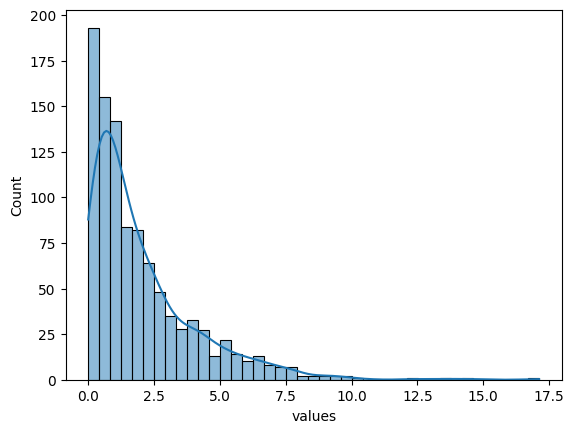

In [15]:
sns.histplot(df['values'], kde=True)

In [16]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

# for box-cox, data must be prositive

df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [17]:
df.head()

,values,Box_Cox,Yeo_Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


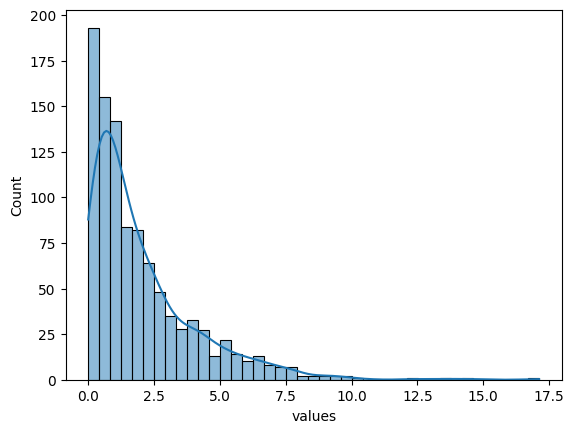

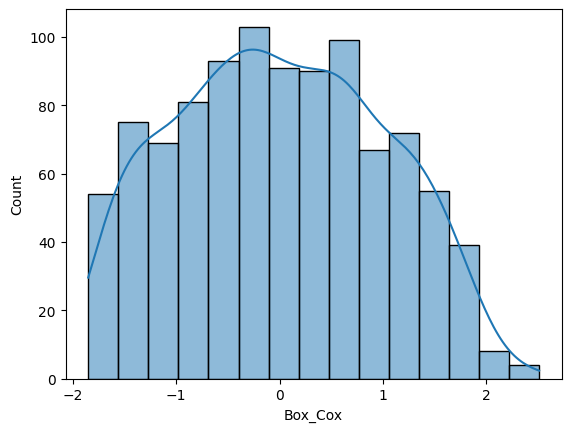

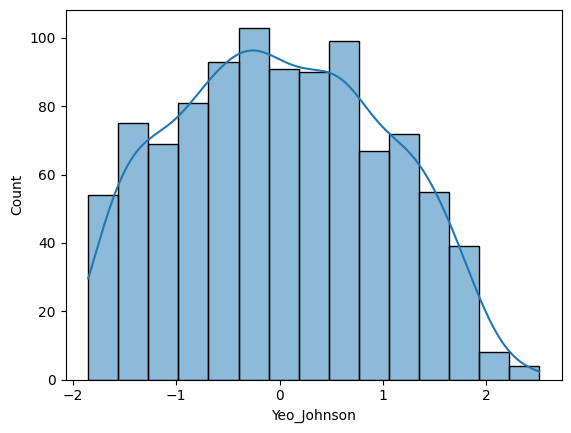

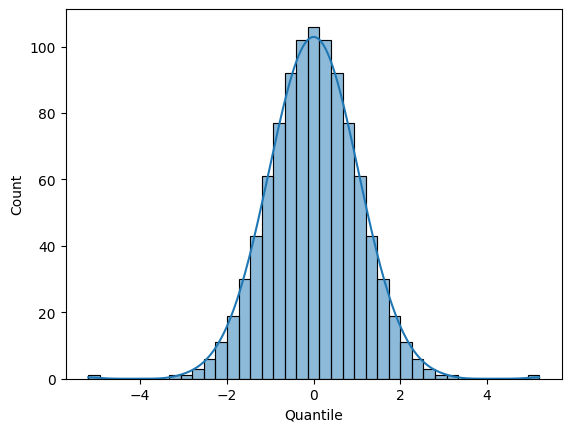

In [18]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

---
# **Normalization**

---

# l2

In [20]:
from sklearn.preprocessing import Normalizer

data = [[1,1,1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# l1

In [21]:
from sklearn.preprocessing import Normalizer

data = [[1,1,1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


1. Z-score normalization
   1. Standard Scalar
2. Min-Max Normalization
   1. Min-Max Scalar 

# Log Transformation

In [26]:
# example dataset with skewed values 
import numpy as np
import pandas as pd

df = {'Values': [1, 5, 10, 20, 50, 100, 500, 1000, 5000, 10000, 20000, 50000, 100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


<Axes: xlabel='Values', ylabel='Count'>

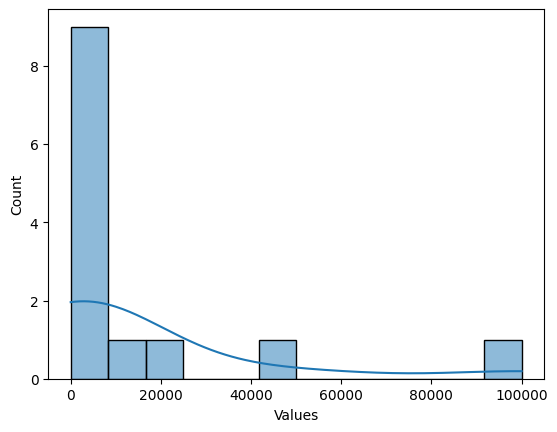

In [27]:
sns.histplot(df['Values'], kde = True)

In [31]:
df['log_values'] = np.log(df['Values'])
df.head()

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023


<Axes: xlabel='log_values', ylabel='Count'>

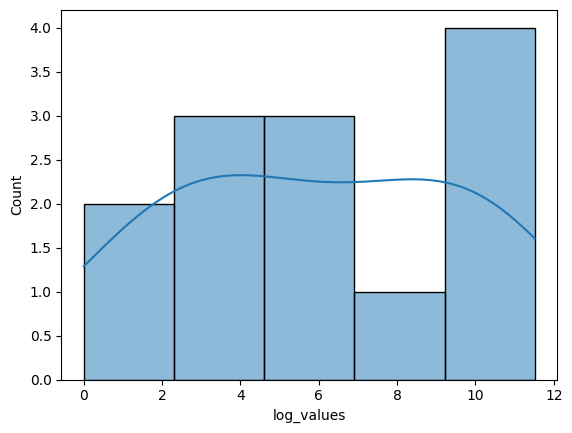

In [30]:
sns.histplot(df['log_values'], kde=True)